# A Practical Introduction to Using Deep Learning for Radiology
Featuring Python, Kaggle, Keras, and Grad-CAM

---

*An exploration of machine learning models for pneumonia classification from chest x-rays*

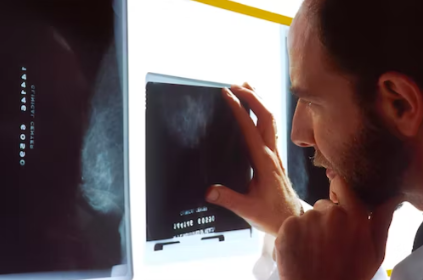

*Artificial intelligence algorithms can help radiologists identify and diagnose pathologies such as pneumonia. This application of AI can serve physicians as a supporting diagnostic tool.*

This notebook explores the application of artificial intelligence in the field of radiology through the development of a deep learning model for pneumonia classification in chest x-rays. The idea of datasets, data science tools, model development, model evaluation, and visualization techniques will be explored. This exploration should provide an end-to-end example of how data scientists can use medical datasets to create machine learning models.

---

Matthew Acs and Richard Acs

## Introduction


---


This assignment aims to illustrate a simple machine learning workflow with a medically focused scope. Machine learning in healthcare is a rapidly advancing field with countless new datasets and architectures being developed and analyzed by the data science community every year. As a result of such advances, more and more engineers are breaking into medical machine learning research. With the countless number of complex tools, libraries, and workflows available to researchers, students learning in the field can easily feel overwhelmed. This project seeks to stay away from complex tools and serve as a beginners first hands on example, only utilizing basic python machine learning libraries such as Keras and sklearn. The workflow is very similar to any other binary image classification problem one might come across; the data is preprocessed, the model is designed, compiled, and trained, the confusion matrix and training graphs are shown, and predictions are made on test data. However, this notebook places a larger emphasis on exploring the dataset and attempting to make sense of the model’s predictions. Data is important to any machine learning project, but especially so in medical settings where predictions may directly impact human wellbeing. Thus, the quality and source of the data is discussed. Additionally, grad-cam is used to visualize the weight activations in the model to make sense of where the model is focusing on for predictions. Finally, data augmentation tools are also used to increase the size of the dataset and improve the performance of the model. All of these supplementary features to the model represent very basic implementations of tools used in research to improve model performance and help explain the results of the model. Essentially, this notebook explores the medical machine learning workflow through a simple example that can be used as a skeleton to learn and build upon. 

## Data and Dependencies


---


The code cell below imports all the dependencies that are required for project.

In [1]:
# Dependencies
from google.colab import files
from IPython.display import Image, display
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential, load_model
from tensorflow.keras import layers
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from tensorflow import keras
import keras
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import pathlib
import PIL
import seaborn as sns
import tensorflow as tf

### Kaggle

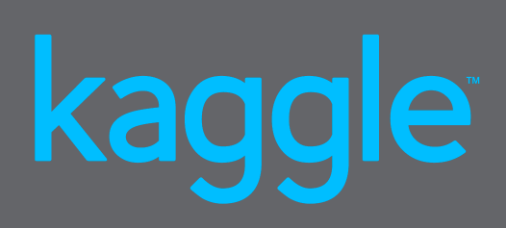

*Kaggle is a popular online community of data scientists*

The data used in this notebook is acquired through public Kaggle datasets. Kaggle is a large online community of data scientists and engineers focusing on machine learning education and project development. When it was first founded, Kaggle was used as a platform to host machine learning competitions, but it has since expanded to include public datasets, a cloud-based Jupiter notebook setup, and a community of users that can share and collaborate on notebooks and datasets. For the purposes of this notebook, Kaggle was used to acquire the publicly available pneumonia chest X-ray images used to build our neural network model. Due to its large and active community, Kaggle can be an import source of medical datasets for testing or developing new machine learning models, but careful consideration of the data should be taken when using publicly available, non-Kaggle challenge commissioned data. Such data can have errors, biases, and inaccuracies that can make the data unusable. 

The code cells below set up an API connection to Kaggle using our API credentials. This allows us to directly download the chest x-ray pneumonia dataset from Kaggle onto this Google Colab. As shown by these cells, another advantage to using Kaggle is the ease at which datasets can be accessed and processed within very few commands. The code below also lists alternate dataset options which are currently popular on Kaggle.

In [2]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"matthewacs2","key":"c2466c0df50d0d67793a1a3b695e873e"}'}

In [5]:
! cp kaggle.json ~/.kaggle/

In [6]:
! chmod 600 ~/.kaggle/kaggle.json

In [7]:
! kaggle datasets list

ref                                                             title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
meirnizri/covid19-dataset                                       COVID-19 Dataset                                      5MB  2022-11-13 15:47:17           5278        162  1.0              
madhurpant/world-deaths-and-causes-1990-2019                    World Deaths and Causes (1990 - 2019)               442KB  2022-11-29 07:09:27            762         23  1.0              
thedevastator/jobs-dataset-from-glassdoor                       Salary Prediction                                     3MB  2022-11-16 13:52:31           3469         82  1.0              
thedevastator/how-much-sleep-do-americans-really-get        

In [8]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

100% 2.29G/2.29G [00:12<00:00, 228MB/s]
100% 2.29G/2.29G [00:12<00:00, 193MB/s]


In [9]:
!unzip chest-xray-pneumonia.zip

Streaming output truncated to the last 5000 lines.
  inflating: chest_xray/train/NORMAL/IM-0435-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0435-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0438-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0440-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0441-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0442-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0444-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0445-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0446-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0447-0001.jpeg  
  inflating:

**Dataset**

This dataset is one of the more popularly used radiology datasets on Kaggle, with over 197,000 downloads as of December 2022. Additionally, this dataset has a usability score of 7.5 on Kaggle, which is a metric that describes the level of documentation of a dataset. The following description is from the dataset's Kaggle page and explains the contents of the dataset:

**Contents**

The dataset is organized into 3 folders (train, test, val) and contains subfolders for each image category (Pneumonia/Normal). There are 5,863 X-Ray images (JPEG) and 2 categories (Pneumonia/Normal).

Chest X-ray images (anterior-posterior) were selected from retrospective cohorts of pediatric patients of one to five years old from Guangzhou Women and Children’s Medical Center, Guangzhou. All chest X-ray imaging was performed as part of patients’ routine clinical care.

For the analysis of chest x-ray images, all chest radiographs were initially screened for quality control by removing all low quality or unreadable scans. The diagnoses for the images were then graded by two expert physicians before being cleared for training the AI system. In order to account for any grading errors, the evaluation set was also checked by a third expert.  


### Data Preparation

The chest x-ray data must be prepared before it can be used to train a deep learning model. The first step in preparing the data is to find the file paths. An unprocessed image is printed below to ensure that the right file paths were found. Keras has a function called image_dataset_from_directory that is useful to process image data into datasets. This function is used to create training, validation, and test datasets. The function resized the images, created labels, and encoded them into numeric values. Once this step is complete, the data can be further explored to get a better understanding of the dataset’s characteristics.

A Sample Unprocessed Image:



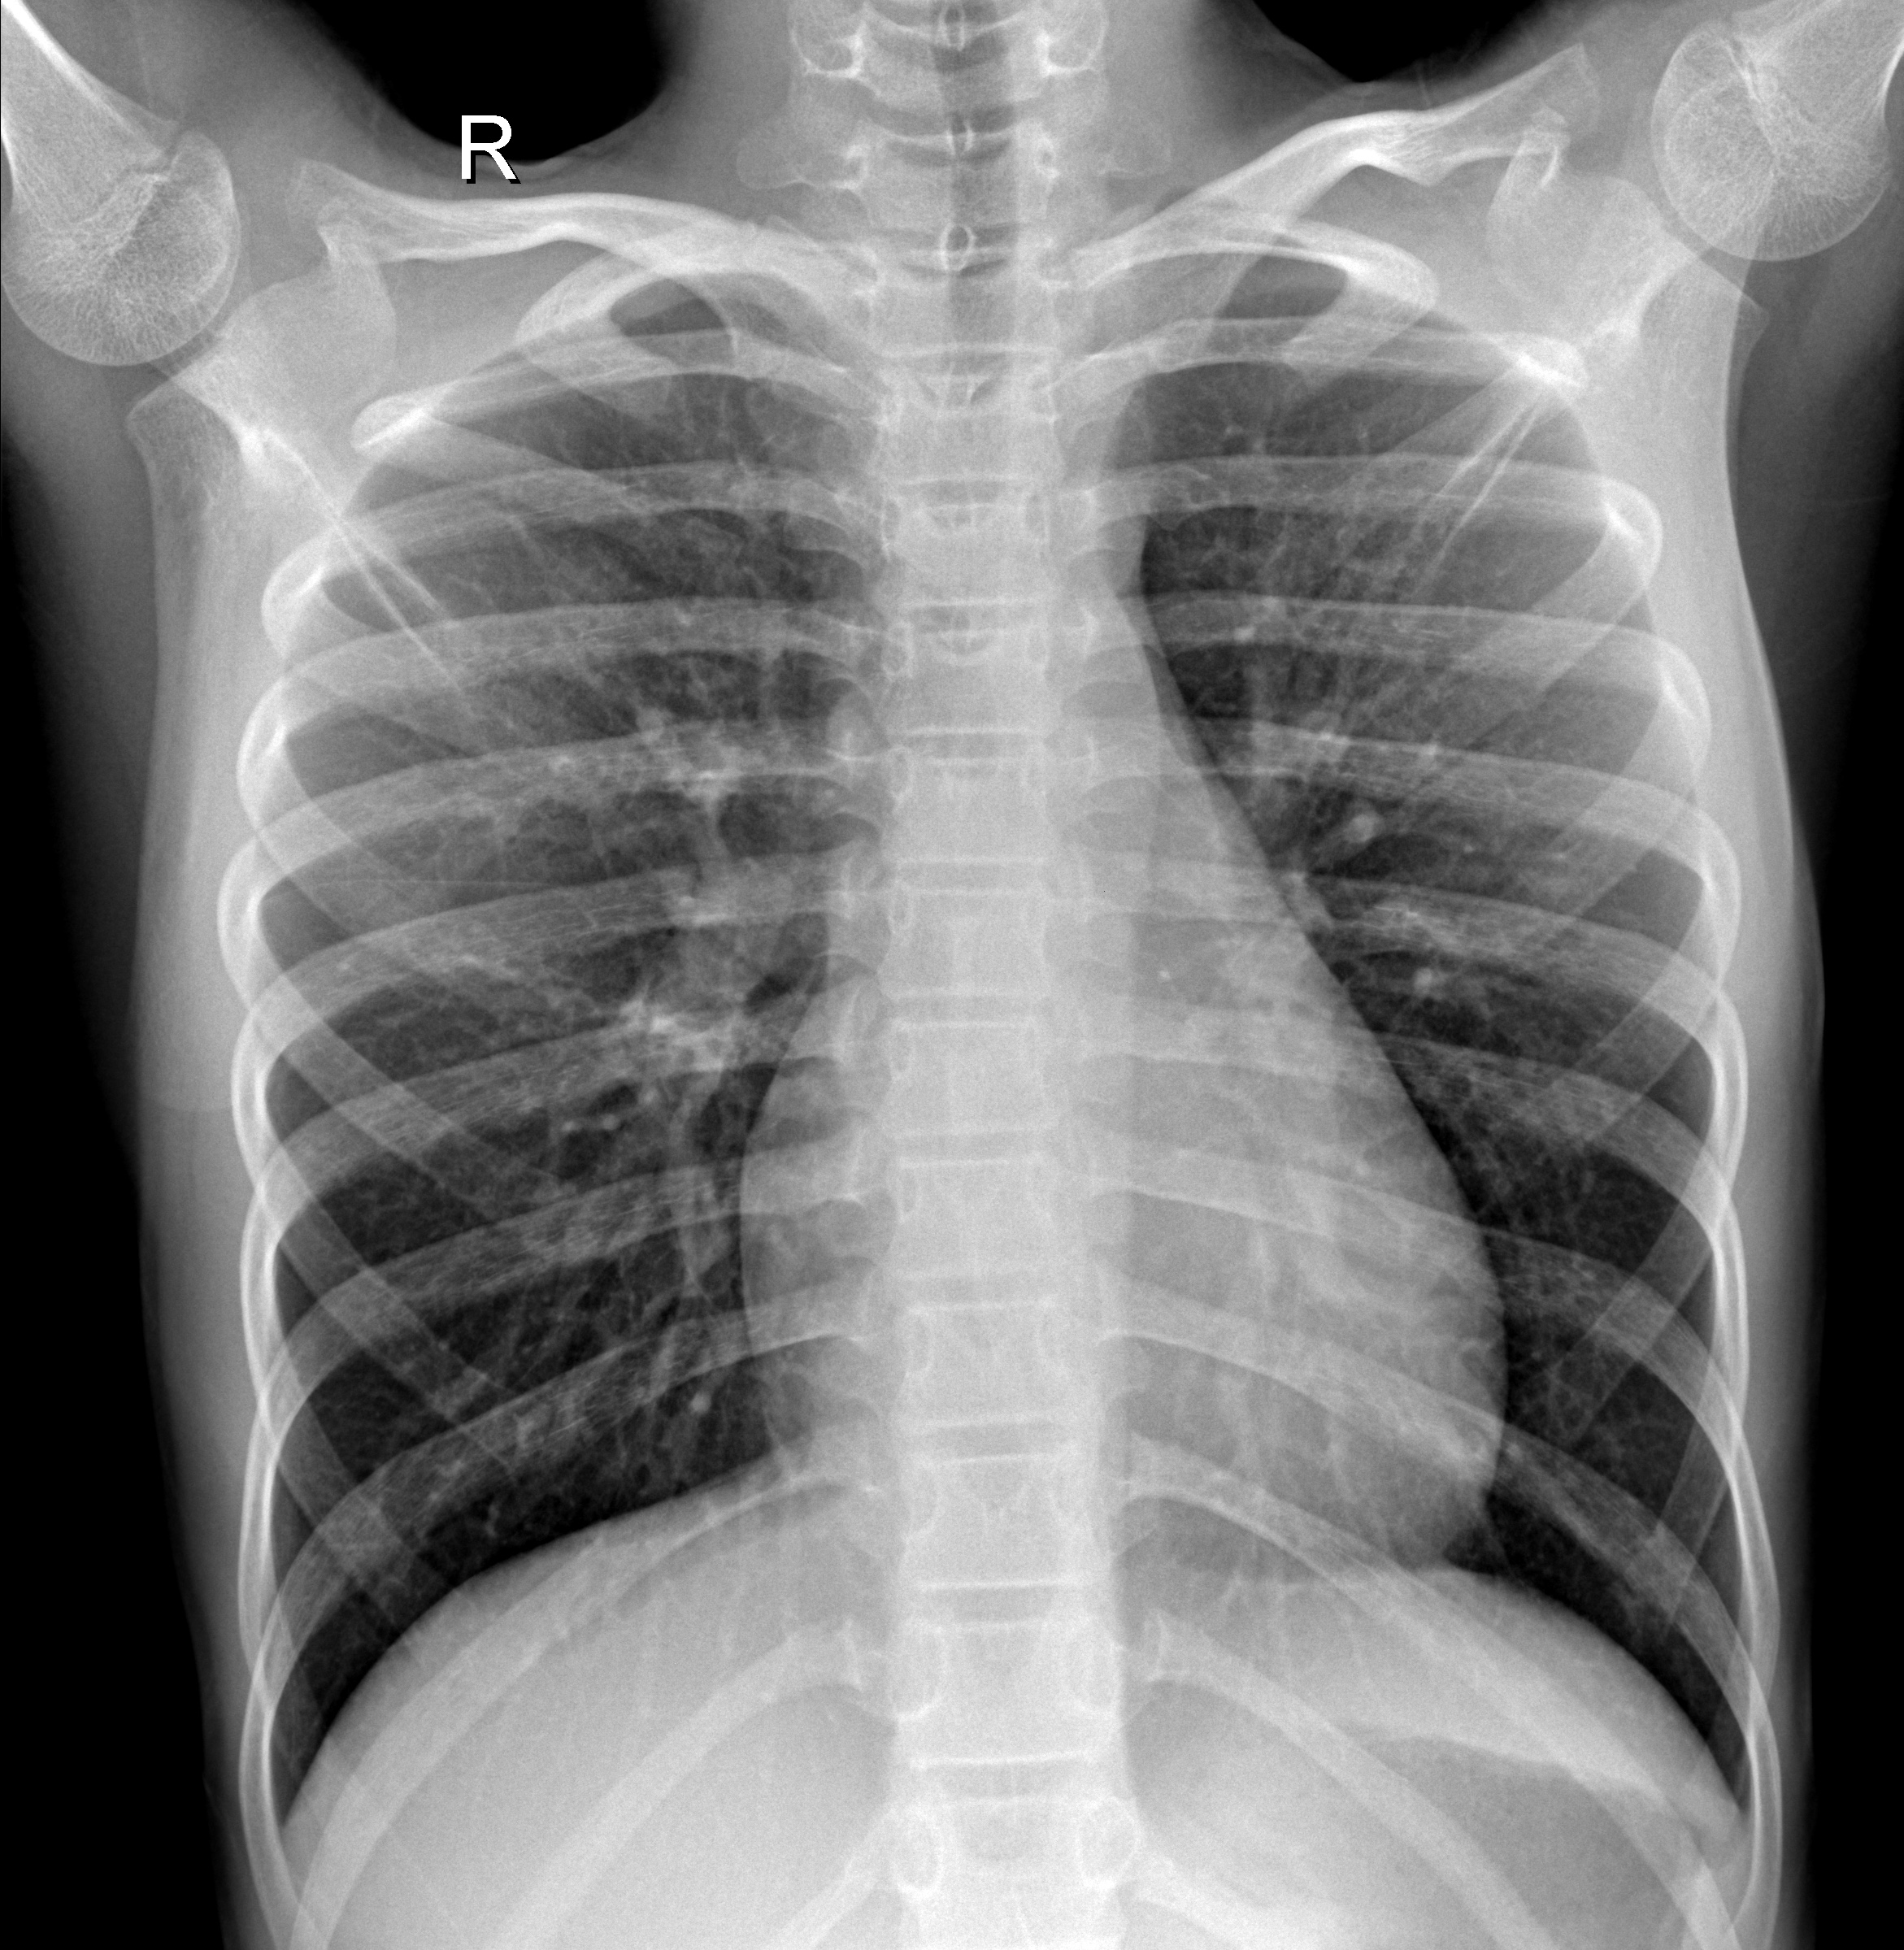

In [10]:
# file paths
train_root = './chest_xray/chest_xray/train'
val_root = './chest_xray/chest_xray/test'
test_root = './chest_xray/chest_xray/val'
data_dir = pathlib.Path(train_root)

# visualize data
print("A Sample Unprocessed Image:")
print()
x_ray = list(data_dir.glob('NORMAL/*'))
PIL.Image.open(str(x_ray[1]))

In [11]:
# creating the image datasets using 
# keras's preprocessing function
print("Training Data:")
train_data = tf.keras.preprocessing.image_dataset_from_directory(
    train_root,
    labels="inferred",
    label_mode='int',
    batch_size=32,
    image_size=(256,256))
print()

print("Validation Data:")
validation_data = tf.keras.preprocessing.image_dataset_from_directory(
    val_root,
    labels="inferred",
    label_mode='int',
    batch_size=32,
    image_size=(256,256))
print()

print("Test Data:")
test_data = tf.keras.preprocessing.image_dataset_from_directory(
    test_root,
    labels="inferred",
    label_mode='int',
    batch_size=16,
    image_size=(256,256))
print()

class_names = train_data.class_names
print("Classes:")
print(class_names)

Training Data:
Found 5216 files belonging to 2 classes.

Validation Data:
Found 624 files belonging to 2 classes.

Test Data:
Found 16 files belonging to 2 classes.

Classes:
['NORMAL', 'PNEUMONIA']


### Data Distribution

One important aspect of the data that is necessary to consider is the distribution between the two classes. The plots below print the number of normal and pneumonia chest x-rays that are found in the training, validation, and test datasets. Based on the plots, there are almost three times more cases of pneumonia in the training dataset than normal cases. A similar trend is present in the validation dataset with almost twice the number of cases of pneumonia compared to normal cases. Finally, the test data is a 50-50 split between the two classes. These statistics are important to consider because they imply that a model that always predicts pneumonia should be able to get at least a ~75% accuracy on the training data, ~66% on the validation data, and 50% on the test data. If the trained model does not beat these metrics, then it would perform worse than the established baseline.

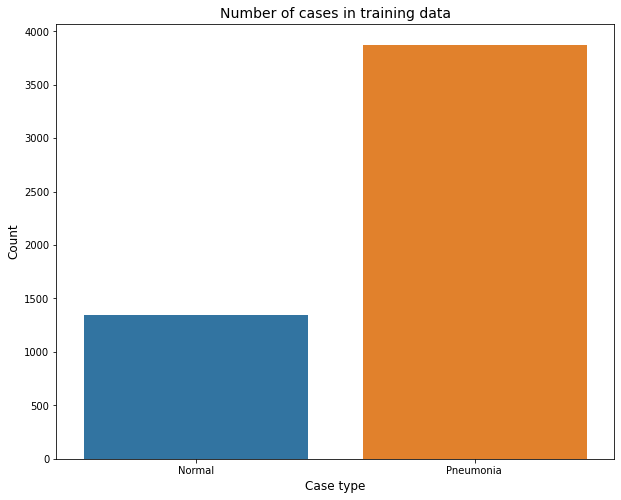

In [12]:
plt.figure(figsize=(10,8))
sns.barplot(x=['Normal', 'Pneumonia '], y= [1341,3875])
plt.title('Number of cases in training data', fontsize=14)
plt.xlabel('Case type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

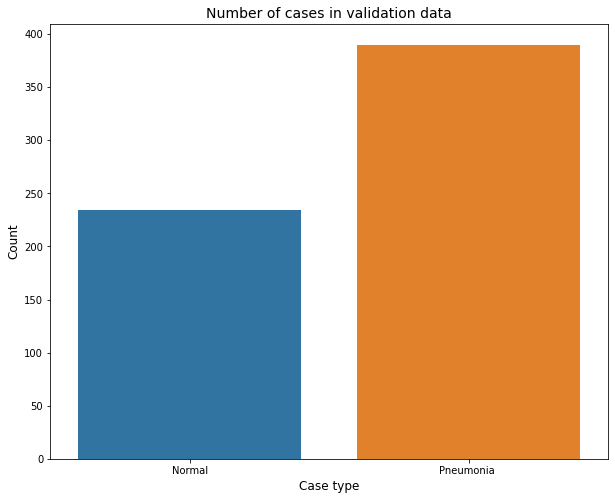

In [13]:
plt.figure(figsize=(10,8))
sns.barplot(x=['Normal', 'Pneumonia '], y= [234,390])
plt.title('Number of cases in validation data', fontsize=14)
plt.xlabel('Case type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

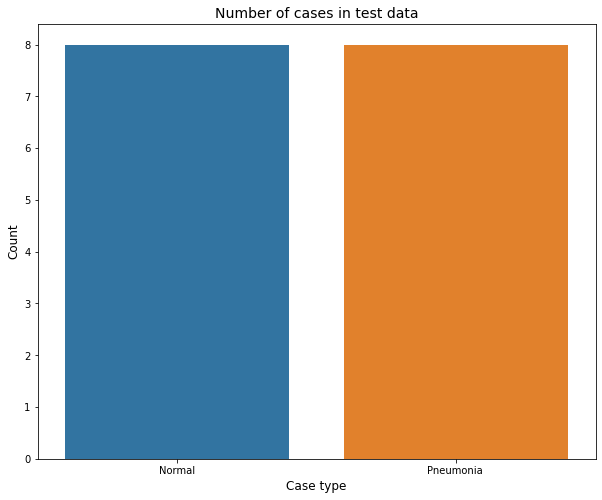

In [14]:
plt.figure(figsize=(10,8))
sns.barplot(x=['Normal', 'Pneumonia '], y= [8,8])
plt.title('Number of cases in test data', fontsize=14)
plt.xlabel('Case type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

The code below prints a few training data samples along with their labels. It is not always easy to distinguish between the two classes. In general, it seems that cases of pneumonia have cloudier images with streaks and spots of white among the lungs. According to radiologyinfo.org, chest x-rays can be classified as containing pneumonia if white spots (called infiltrates) are present in the lungs, which generally confirms the intuition previously discussed.

Training Data Samples:


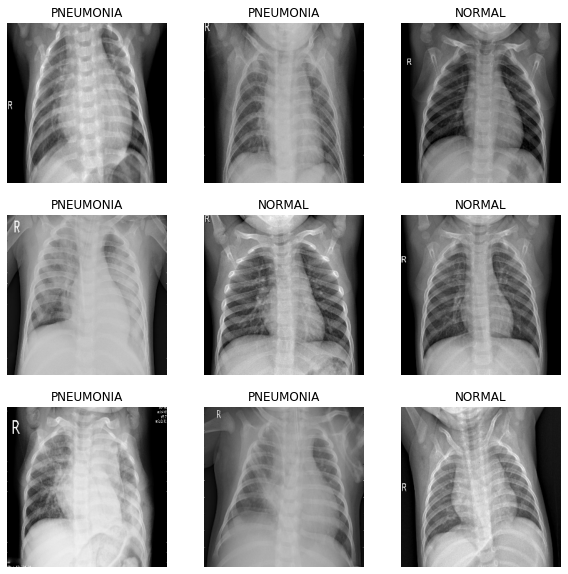

In [15]:
print("Training Data Samples:")

plt.figure(figsize=(10, 10))
for images, labels in train_data.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[int(labels[i].numpy().astype("uint8"))])
    plt.axis("off")

The code below prints the shape of each data and label batch to ensure that the dataset has been properly prepared.

In [16]:
for image_batch, labels_batch in train_data:
  print("Size of a batch of training images:")
  print(image_batch.shape)
  print()
  print("Size of a batch of training labels:")
  print(labels_batch.shape)
  break

Size of a batch of training images:
(32, 256, 256, 3)

Size of a batch of training labels:
(32,)


### Data Augmentation

To increase the size of the training dataset, data augmentation is used. This entails adding layers to the deep learning model to create new training datapoints by randomly flipping, magnifying, and rotating images. The amount of magnification and rotation is defined to remain within a small range. This process increases the size of the dataset by creating new valid training datapoints from existing datapoints using basic image transformations. This increases the generalizability of the model because it increases the variation in data that the model is exposed to. The code below creates a data augmentation layer and applies it to a training data sample. The result is printed to visualize the impact of the data augmentation on the image.

In [17]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(256,
                                  256,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

Augmented Data Samples:


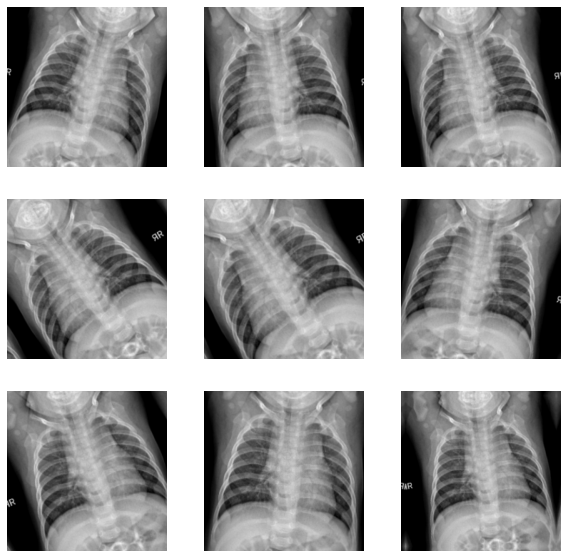

In [18]:
print("Augmented Data Samples:")
plt.figure(figsize=(10, 10))
for images, _ in train_data.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

## Model


---


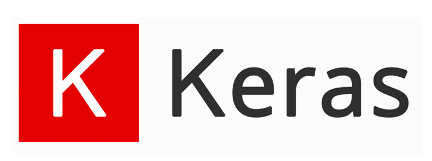

*Keras is a python deep learning API based on TensorFlow*

The deep learning tool used to create the CNN for image classification is Keras. Keras is a python API for TensorFlow, which is a deep learning library. Keras allows users to easily create, train, test, and evaluate deep learning models. The code below uses Keras to define a model architecture and train the model. Keras is a popular API that is used in many deep learning projects, from research to industry.

### Model Setup

The code below defines the model architecture and then prints a summary. The model is a CNN with a data augmentation layer, a data preprocessing layer, convolutional layers, a dropout layer, and an output layer. The architecture is inspired by examples of image classification models found on the official Keras documentation. The model summary below provides more details on the specifics of each model layer, including the number of parameters.

In [19]:
num_classes = len(class_names)

model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255, input_shape=(256, 256, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, name="outputs")
])

In [20]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 256, 256, 3)       0         
                                                                 
 rescaling (Rescaling)       (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 256, 256, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                  

### Model Training

The following code cells configure and initiate the model training process. By utilizing ModelCheckpoint and the callbacks parameter provided by Keras in model.fit, the training process saves the best model for later use in predicting test data. We use 15 for the number of epochs, and save the metrics from training to a history variable for later display and graphing.

In [21]:
filepath = 'my_best_model.hdf5'
checkpoint = ModelCheckpoint(filepath=filepath, 
                             monitor='val_loss',
                             verbose=1, 
                             save_best_only=True,
                             mode='min')
callbacks = [checkpoint]

In [22]:
epochs = 15
history = model.fit(
  train_data,
  validation_data=validation_data,
  epochs=epochs,
  callbacks=callbacks
)

Epoch 1/15
163/163 [==============================] - ETA: 0s - loss: 0.5646 - accuracy: 0.7345
Epoch 1: val_loss improved from inf to 0.39362, saving model to my_best_model.hdf5
163/163 [==============================] - 45s 209ms/step - loss: 0.5646 - accuracy: 0.7345 - val_loss: 0.3936 - val_accuracy: 0.8205
Epoch 2/15
163/163 [==============================] - ETA: 0s - loss: 0.2590 - accuracy: 0.8884
Epoch 2: val_loss improved from 0.39362 to 0.37393, saving model to my_best_model.hdf5
163/163 [==============================] - 35s 208ms/step - loss: 0.2590 - accuracy: 0.8884 - val_loss: 0.3739 - val_accuracy: 0.8237
Epoch 3/15
163/163 [==============================] - ETA: 0s - loss: 0.2219 - accuracy: 0.9095
Epoch 3: val_loss improved from 0.37393 to 0.28844, saving model to my_best_model.hdf5
163/163 [==============================] - 35s 206ms/step - loss: 0.2219 - accuracy: 0.9095 - val_loss: 0.2884 - val_accuracy: 0.8590
Epoch 4/15
163/163 [==============================] -

The model peaks at about 90% validation accuracy at epoch 9. The training accuracy rose to 95% by epoch 7 but stayed relatively stagnant after until the end of the training process. Using a GPU, model training took approximately 10 minutes, and it would take nearly an hour using CPU. A more in-depth analysis of the training curves, overfitting, and test data analysis are discussed below. 

## Model Evaluation and Visualizations


---


Once the model has been trained, it is important to evaluate and visualize it. This can be done in a variety of ways, from using a test dataset and obtaining metrics of success, to printing a heatmap to view the activations of the final convolutional layer. The code below creates predictions on a test dataset, computes three metrics of success, and prints a confusion matrix. A Grad-CAM based heatmap is also generated to view what areas of the image the CNN focused on to make the classification.

### Accuracy and Loss Curves

The code below prints the plots for training and validation accuracy as a function of epochs and training and validation loss as a function of epochs. The graphs show that the model begins to overfit, however, the dropout and regularization methods prevent it from doing so quickly. The training accuracy increases, and the training loss decreases in a characteristic curve that shows that the model is successfully learning the patterns present in the dataset. The validation curves are much more stochastic, with the best results occurring between the 5th and 10th epochs. The training and validation accuracies surpass the baselines set earlier by the naïve always-predict-pneumonia model.

Metrics vs Epochs


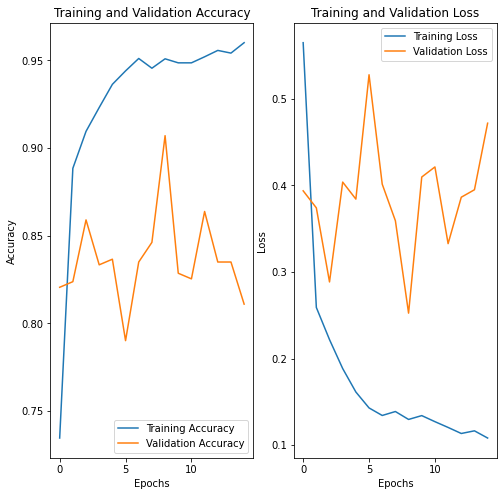

In [23]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy') 
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss') 
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

print("Metrics vs Epochs")
plt.show()

### Model Testing

The following section will evaluate the model on the test dataset. The predictions will be generated for the test datapoints, and the model performance will be evaluated using a confusion matrix and success metrics. This will be an important source of insight into the performance of the model because the model has never seen the test data before. The model saved from the best performing epoch (based on validation loss) will be used.

In [24]:
model = load_model(filepath)

The code below retrieves some test datapoints along with their labels.

Test Data Samples:


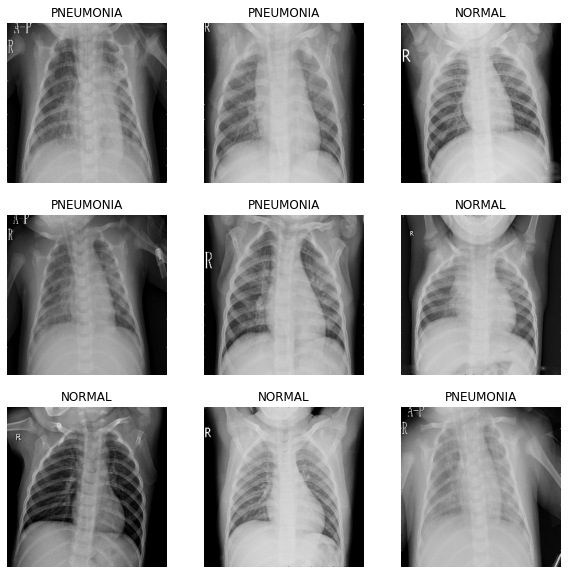

In [25]:
print("Test Data Samples:")

plt.figure(figsize=(10, 10))
for images, labels in test_data.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[int(labels[i].numpy().astype("uint8"))])
    plt.axis("off")

#### Predictions

The code below generates predictions for the test dataset. The predictions are then displayed as probabilities, and then as discrete class predictions. The classifier is not always certain, with some datapoints receiving roughly 30% to 70% probabilities, while other datapoints have 99% probabilities. The class with the highest probability is used when generating the discrete predictions.

In [26]:
image_batch, labels_batch = next(iter(test_data))
print("Generating Predictions:")
predictions = model.predict(image_batch)

Generating Predictions:
1/1 [==============================] - 0s 105ms/step


In [27]:
scores = tf.nn.softmax(predictions)

print("Probability of Each Class:")
print("        " + class_names[0] + " | " + class_names[1])
print(np.array(scores))
print()
class_predictions = predictions.argmax(axis=-1)
print("Predictions (NORMAL = 0, PNEUMONIA = 1):")
print(class_predictions)

Probability of Each Class:
        NORMAL | PNEUMONIA
[[0.0293502  0.9706498 ]
 [0.99108547 0.00891447]
 [0.02308246 0.9769175 ]
 [0.3826616  0.6173384 ]
 [0.98984504 0.01015492]
 [0.29906407 0.70093596]
 [0.00231136 0.99768865]
 [0.20007926 0.79992074]
 [0.96344346 0.03655648]
 [0.00236878 0.9976312 ]
 [0.37985766 0.62014234]
 [0.02711014 0.9728899 ]
 [0.9869278  0.0130722 ]
 [0.9374549  0.06254505]
 [0.7359449  0.2640551 ]
 [0.9833763  0.01662364]]

Predictions (NORMAL = 0, PNEUMONIA = 1):
[1 0 1 1 0 1 1 1 0 1 1 1 0 0 0 0]


#### Accuracy, Precision, and Recall

Once the predictions are generated, they can be compared with the labels to calculate the accuracy, precision, and recall. The accuracy is the number of correct classifications compared to the total number of classifications. Precision is the total number of true positive divided by all positive predictions. Recall is the number of true positives divided by the sum of the true positives and false negatives. The metrics obtained on one execution of the code were 93.75% accuracy, 88.8% precision, and 100% recall. These metrics beat the naïve baseline discussed earlier and represent a (relatively) successful model.

In [28]:
labels = np.asarray(labels_batch)
print("Test Accuracy:")
print(accuracy_score(labels, class_predictions))
print()
print("Test Precision:")
print(precision_score(labels, class_predictions))
print()
print("Test Recall:")
print(recall_score(labels, class_predictions))

Test Accuracy:
0.9375

Test Precision:
0.8888888888888888

Test Recall:
1.0


#### Confusion Matrix

The code cell below creates a confusion matrix to visualize the classifications produced by the model. The confusion matrix shows that only one datapoint was misclassified. This datapoint was a normal x-rays that was classified as pneumonia. This is consistent with the success metrics obtained earlier. It is also interesting to note that there are no false negatives, meaning that every individual who requires treatment would be properly diagnosed using this model. However, some healthy individuals would be incorrectly diagnosed as being diseased.

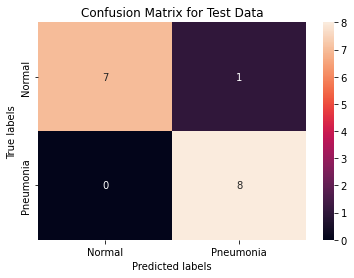

In [29]:
cm = metrics.confusion_matrix(labels, class_predictions)

ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix for Test Data'); 
ax.xaxis.set_ticklabels(['Normal', 'Pneumonia']); ax.yaxis.set_ticklabels(['Normal', 'Pneumonia']);

### Grad-CAM Heatmap

Finally, the code below uses the activations of the final convolutional layer to create a heatmap for a datapoint. This heatmap is called a Grad-CAM and is used to visualize what areas of the image the model is using to create the classifications. The code below is largely based on an example found at the official Keras documentation. The output shows that the model seems to be working correctly, with activations generally occurring around the lung areas. The label and prediction are also displayed. If the heatmap focused on a irrelevant portion of the image, then it may indicate that the model is not working correctly.

In [30]:
def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    # First, we create a model that maps the input image to the activations
    # of the last conv layer as well as the output predictions
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )

    # Then, we compute the gradient of the top predicted class for our input image
    # with respect to the activations of the last conv layer
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    # This is the gradient of the output neuron (top predicted or chosen)
    # with regard to the output feature map of the last conv layer
    grads = tape.gradient(class_channel, last_conv_layer_output)

    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the top predicted class
    # then sum all the channels to obtain the heatmap class activation
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

def save_and_display_gradcam(img_path, heatmap, cam_path="cam.jpg", alpha=0.4):
    # Load the original image
    img = keras.preprocessing.image.load_img(img_path)
    img = keras.preprocessing.image.img_to_array(img)

    # Rescale heatmap to a range 0-255
    heatmap = np.uint8(255 * heatmap)

    # Use jet colormap to colorize heatmap
    jet = cm.get_cmap("jet")

    # Use RGB values of the colormap
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    # Create an image with RGB colorized heatmap
    jet_heatmap = keras.preprocessing.image.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = keras.preprocessing.image.img_to_array(jet_heatmap)

    # Superimpose the heatmap on original image
    superimposed_img = jet_heatmap * alpha + img
    superimposed_img = keras.preprocessing.image.array_to_img(superimposed_img)

    # Save the superimposed image
    superimposed_img.save(cam_path)

    # Display Grad CAM
    display(Image(cam_path))

1/1 [==============================] - 0s 33ms/step
Predicted: NORMAL
Actual: NORMAL


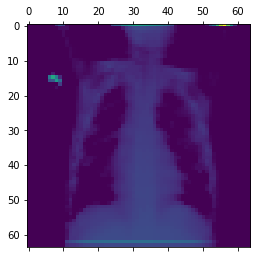

In [52]:
image_batch, labels_batch = next(iter(validation_data))
labels = np.asarray(labels_batch)
img_array = image_batch

# Remove last layer's softmax
model.layers[-1].activation = None

# Print what the top predicted class is
preds = model.predict(img_array)
print("Predicted:", class_names[preds[0].argmax(axis=-1)])
print("Actual:", class_names[labels[0]])

# Generate class activation heatmap
heatmap = make_gradcam_heatmap(img_array, model, "conv2d_2")

# Display heatmap
plt.matshow(heatmap)
plt.show()

## Discussions and Conclusions


---


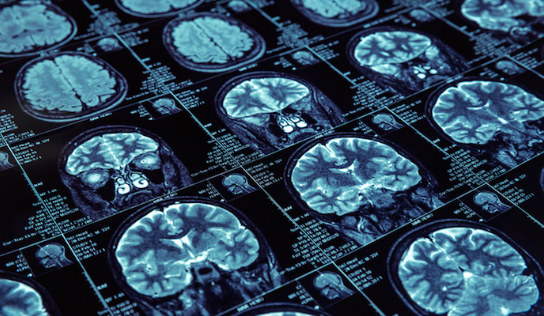

Overall, this notebook showed how deep learning can be used for applications in radiology. The CNN was able to classify the chest x-rays with a relatively successful level of accuracy. The complete machine learning workflow, from importing the data to visualizing the results, was shown for the specific task of pneumonia classification in x-rays. The processes utilized several important data science tools such as python, Kaggle, and Keras.

The process involved in creating the CNN demonstrated that data and model architecture are incredibly important. On the initial development of the code, the training yielded a model that was unable to overfit to the training data. This meant that something was very wrong because the first step in producing a powerful model is to overfit one to the training data. Adjusting the number of layers and the size of each layer eventually resulted in a model that was capable of overfitting to the training data. The next challenge was to balance the bias vs variance tradeoff to get a model that is accurate but general enough to perform well on unseen data points. This is where data augmentation greatly helped. The data augmentation brought the validation accuracy much higher than before. Adding a final dropout layer to further generalize the model brought it to the state that is shown in the notebook.

While the project used a medical image dataset, it felt very similar to other image classification problems. The use of a Kaggle dataset combined with the familiarity of an image classification task made this notebook feel very data-science oriented rather than medically oriented. Projects such as the one explored in this notebook are important to further the state-of-the-art in deep learning. However, to bring physicians useful AI applications that will assist them in improving patient outcomes, deep learning solutions must be brought one step further. Models must be clinically validated in real-world settings and integrated into applications that physicians can use. This is where physicians must come into the picture. Physicians are ultimately the other side of the medical-AI coin. They will be able to understand the pathologies, anatomy, and ultimately, the tools that they need to improve their impact on patients. The gap between Jupyter notebook style research and clinical application must be bridged for AI to truly have an impact in the world of medicine.

## References

---

The sources below are links to various resources that we utilized while working on this project.
  

- Cover Photo by <a href="https://unsplash.com/@nci?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">National Cancer Institute</a> on <a href="https://unsplash.com/s/photos/radiology?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Unsplash</a>

> *Image credit for cover photo*

- https://www.kaggle.com/

> *Kaggle documentation and image credit*

- https://keras.io/

> *Keras documentation and image credit*

- https://healthitanalytics.com/news/top-5-use-cases-for-artificial-intelligence-in-medical-imaging

> *Discussion section image credit*

- https://www.radiologyinfo.org/en/info/pneumonia

> *Reference on reading chest x-rays for pneumonia diagnosis*

- Kermany, Daniel; Zhang, Kang; Goldbaum, Michael (2018), “Labeled Optical Coherence Tomography (OCT) and Chest X-Ray Images for Classification”, Mendeley Data, V2, doi: 10.17632/rscbjbr9sj.2

> *Dataset Reference non-kaggle*

- https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia

> *Dataset Reference Kaggle*

- https://keras.io/api/preprocessing/image/

> *Keras image preprocessing*

- https://keras.io/examples/vision/grad_cam/

> *Keras Grad-CAM*

- https://keras.io/examples/vision/image_classification_from_scratch/

> *Keras image classification*